In [1]:
# Import dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read the csv file 
insurance_df = pd.read_csv('insurance_data.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Explore data

<AxesSubplot:>

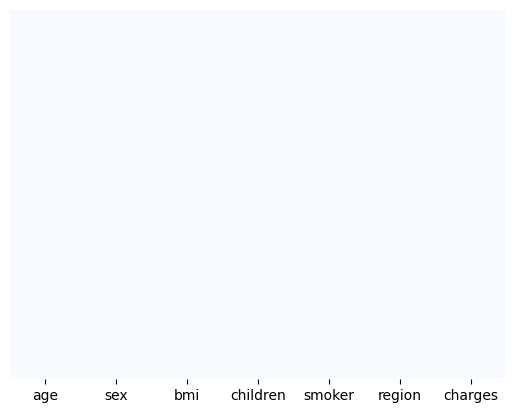

In [5]:
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [6]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df_region = insurance_df.groupby(by = 'region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [8]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [9]:
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [10]:
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [11]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [13]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [14]:
insurance_df.drop(['region'], axis = 1, inplace = True)
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [15]:
insurance_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


In [16]:
# Visualize data

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'charges'}>],
       [<AxesSubplot:title={'center':'northwest'}>,
        <AxesSubplot:title={'center':'southeast'}>,
        <AxesSubplot:title={'center':'southwest'}>]], dtype=object)

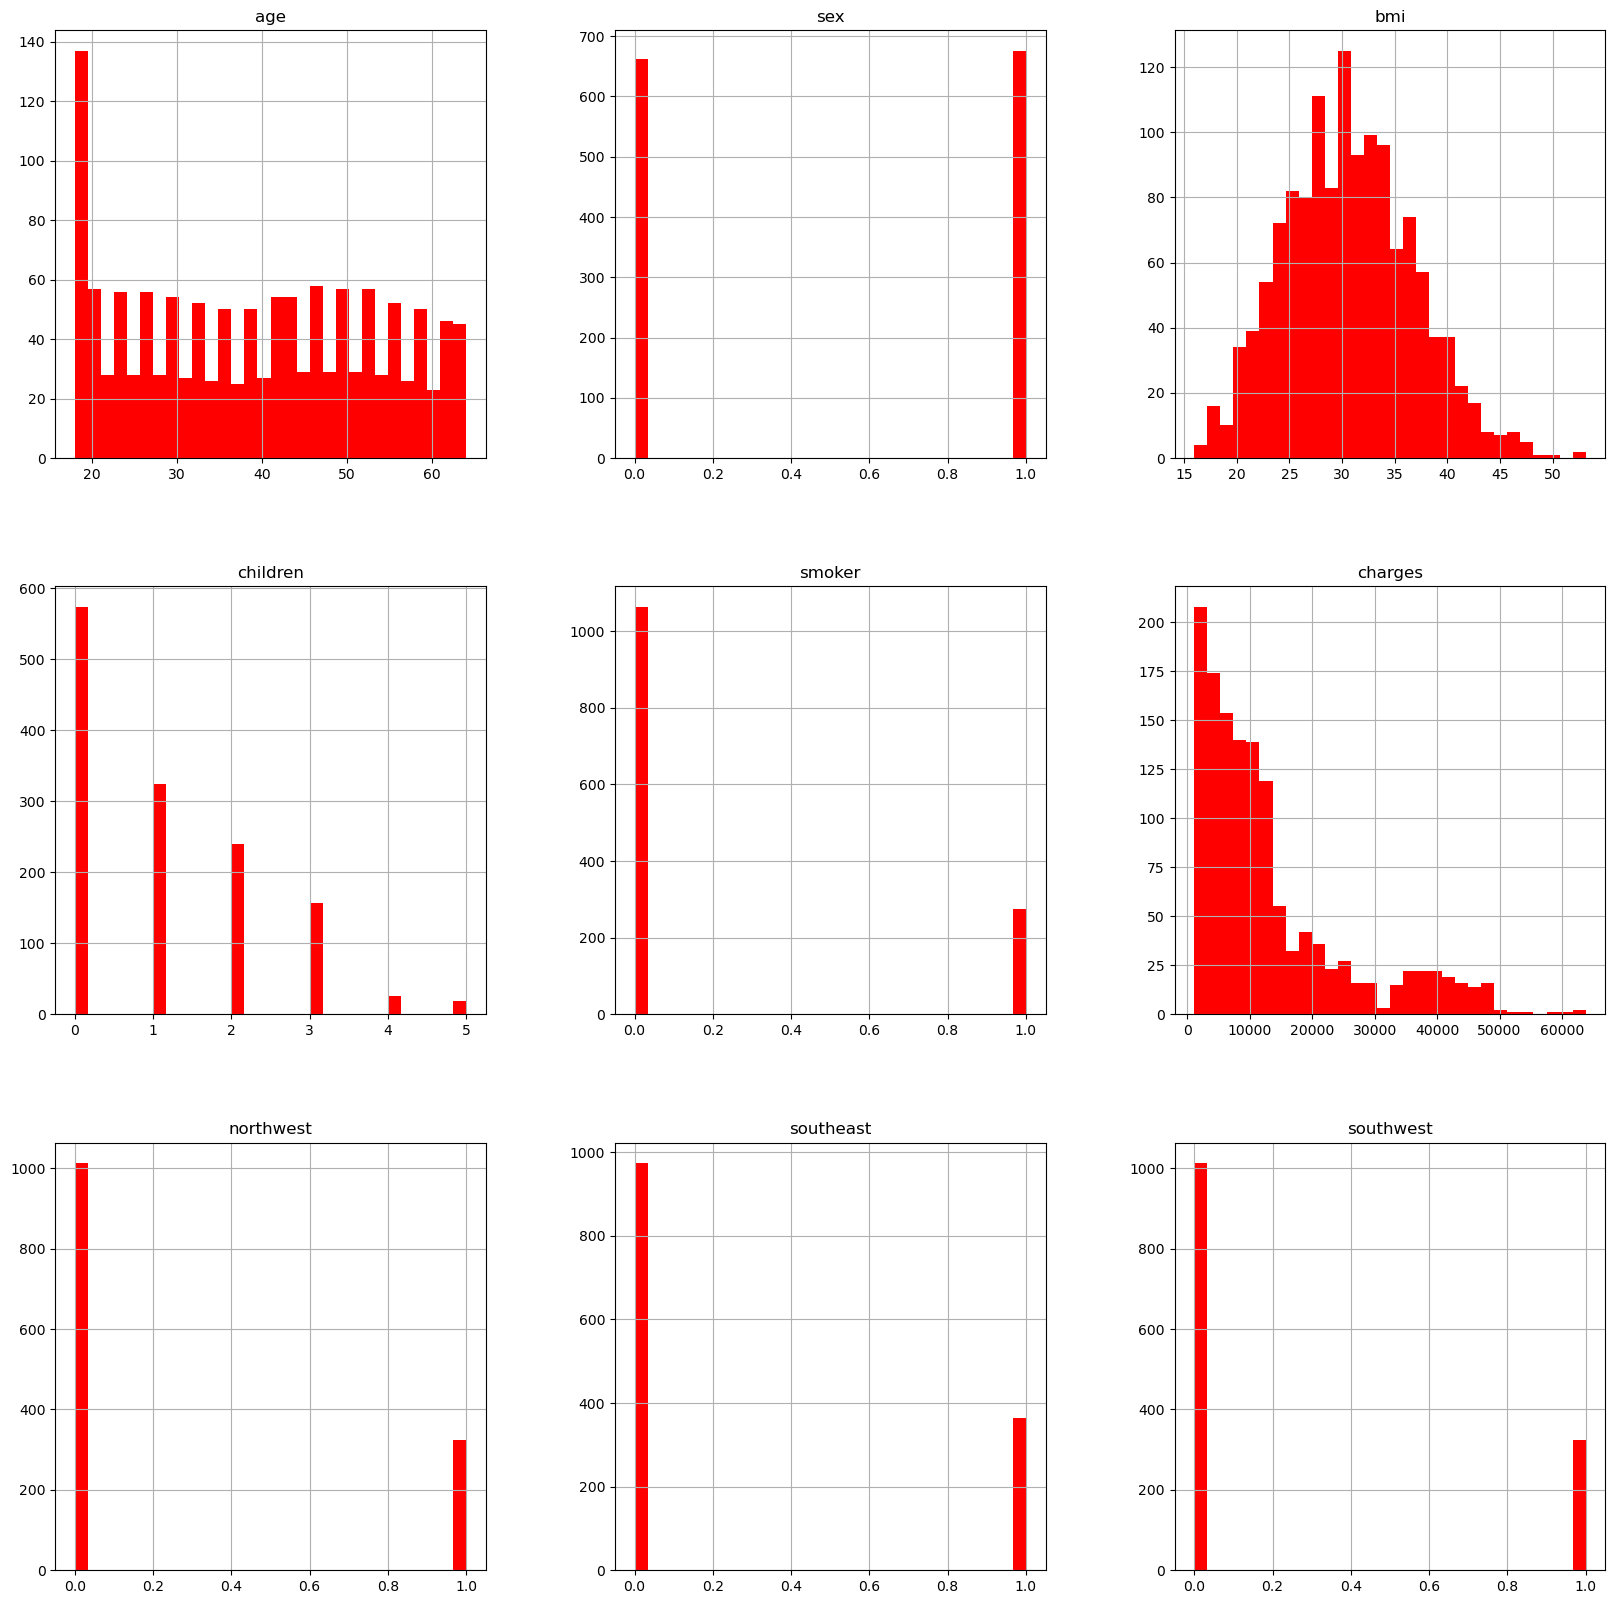

In [17]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest', 'southeast', 'southwest']].hist(bins = 30, figsize = (20,20), color = 'red')                              

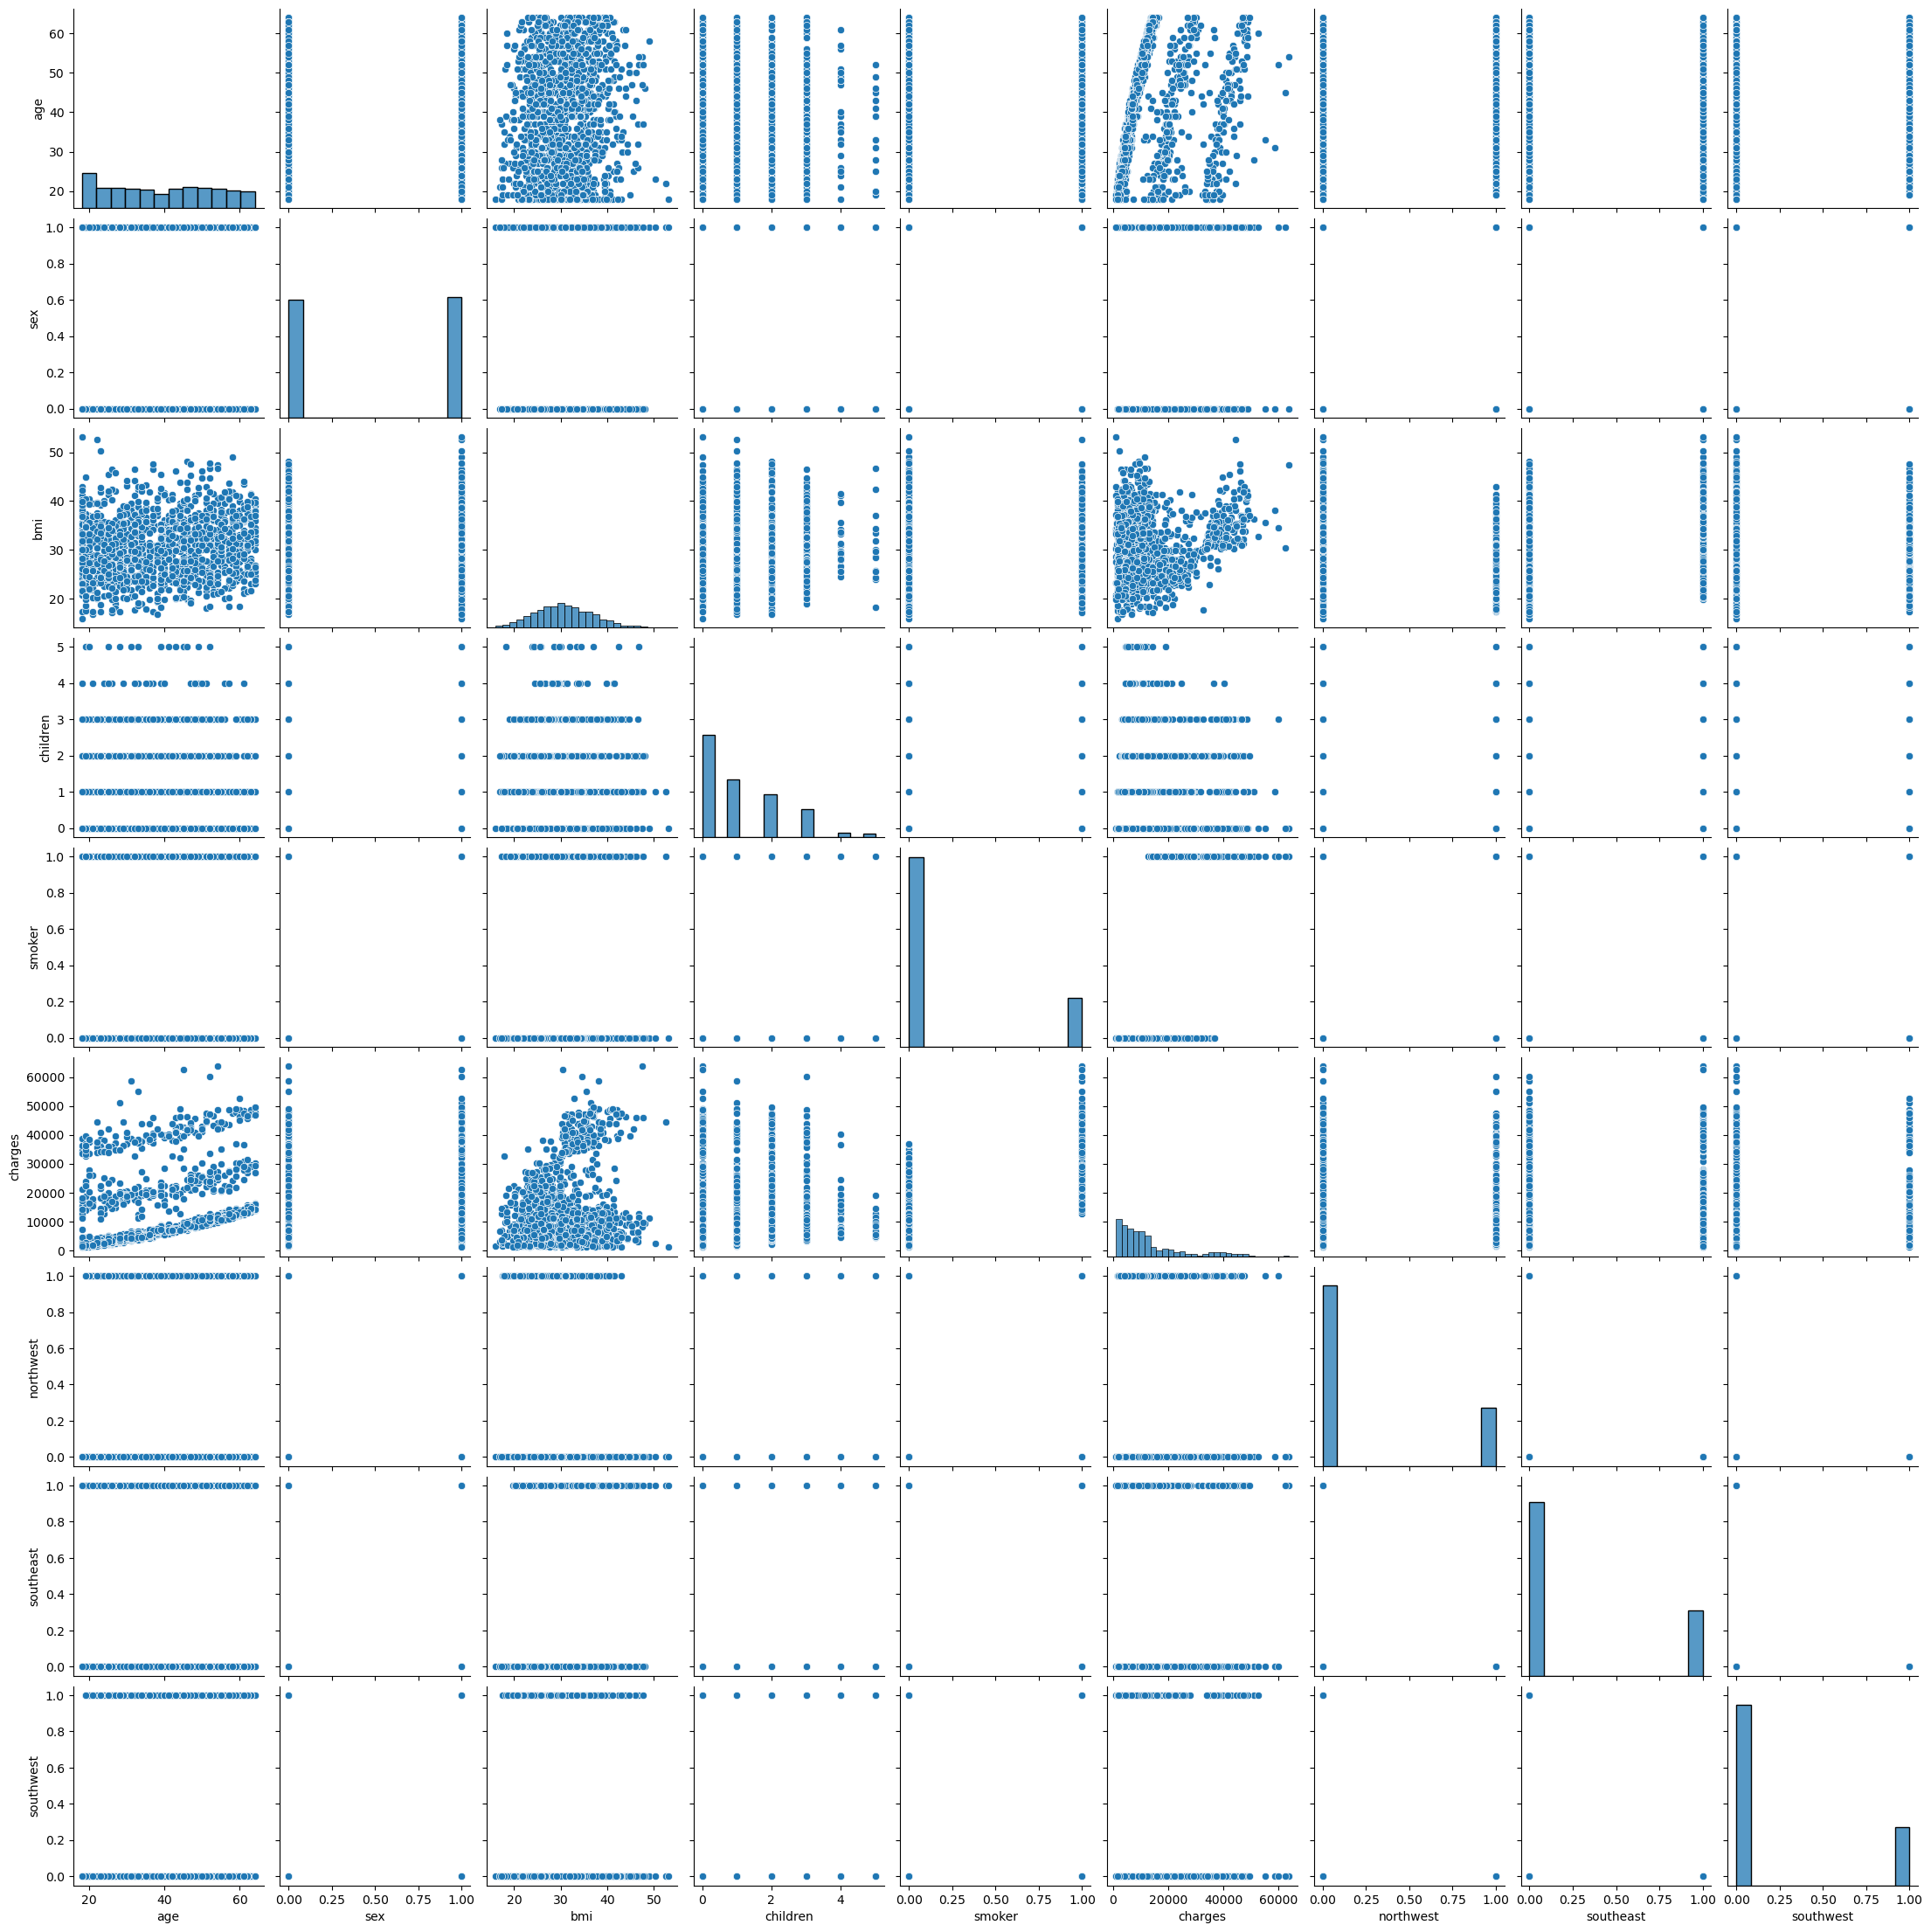

In [18]:
sns.pairplot(insurance_df)

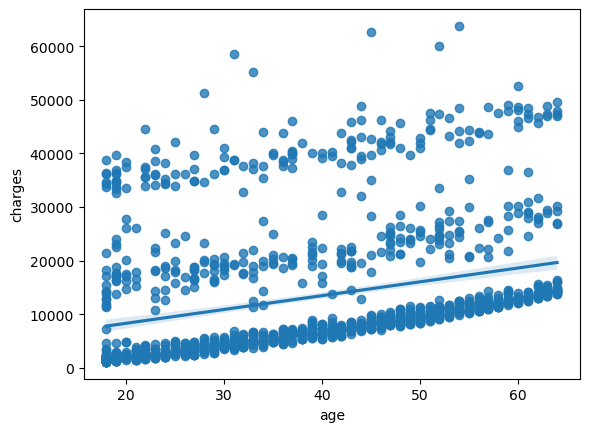

In [19]:
sns.regplot( x = 'age', y = 'charges', data = insurance_df)
plt.show()

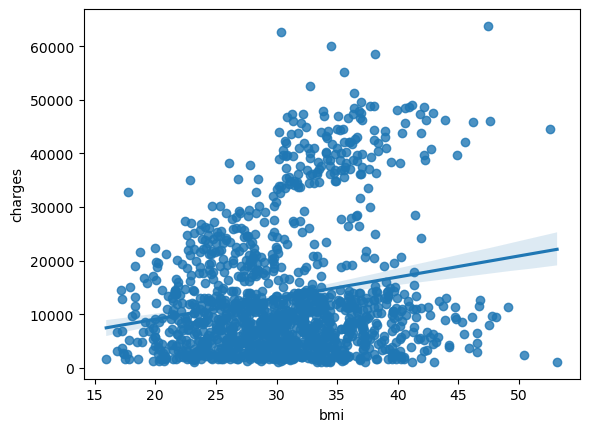

In [20]:
sns.regplot( x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

In [21]:
corr = insurance_df.corr()
corr

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


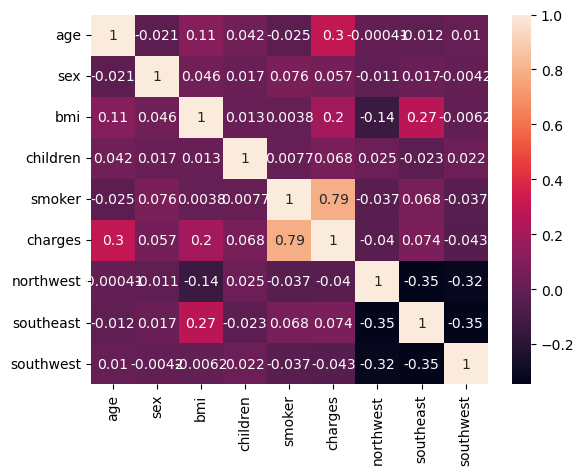

In [22]:
sns.heatmap(corr, annot = True)
plt.show()

In [23]:
# Training and testing

In [24]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [25]:
X = insurance_df.drop(columns = ['charges'])
y = insurance_df['charges']

In [26]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
X.shape

(1338, 8)

In [29]:
y.shape

(1338,)

In [30]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [31]:
y = y.reshape(-1,1)

In [32]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
# Train and test a linear regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [37]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.7329217953787002

In [38]:
y_predict = regression_model_sklearn.predict(X_test)
y_predict

array([[-3.85437608e-01],
       [-5.39230645e-01],
       [-3.58458132e-01],
       [ 1.58816382e-01],
       [ 2.07924819e+00],
       [-3.73290032e-01],
       [-6.01077437e-01],
       [-1.20316759e-01],
       [ 4.92304116e-02],
       [ 1.78720927e+00],
       [ 1.20067269e-01],
       [-4.87660497e-01],
       [-7.89802909e-01],
       [-5.91177404e-01],
       [ 1.63250422e+00],
       [ 1.96239471e+00],
       [-7.93042362e-01],
       [-9.35196519e-01],
       [ 8.91429260e-02],
       [-5.43029726e-01],
       [-9.81430709e-01],
       [-6.31493479e-02],
       [ 1.20984459e+00],
       [-3.60427350e-01],
       [-8.14511001e-01],
       [-6.39276922e-01],
       [-2.18961045e-01],
       [ 2.03435376e-01],
       [-1.89558357e-01],
       [-5.83032787e-01],
       [-1.44789547e-01],
       [-7.22857565e-02],
       [-2.08016202e-01],
       [-9.61859822e-01],
       [ 1.13056350e+00],
       [ 1.97675675e-02],
       [-8.98417644e-03],
       [ 1.94878769e+00],
       [-3.3

In [39]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
y_predict_orig.shape

(268, 1)

In [40]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

rmse = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
mse = mean_squared_error(y_test_orig, y_predict_orig)
mae = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adju_r2 = 1-(1-r2) * (n-1)/ (n-k-1)
print('rmse:', rmse, ', mse:', mse, ', mae:', mae, ', r2:', r2, ', adju_r2:', adju_r2)

rmse: 6245.837 , mse: 39010480.0 , mae: 4367.441 , r2: 0.732921801219065 , adju_r2: 0.7246722815655999


In [42]:
#Train linear learner model in Sagemaker

In [43]:
#import sagemaker
#import boto3

# Creating Sagemaker session using Sagemaker SDK
#sagemaker_session = sagemaker.Session()

#Prefix that we want to use
#bucket = 'sagemaker-studio-454087546327-m5jmqhr5hk'
#prefix = 'insurance'

#role = sagemaker.get_execution_role()
#print(role)

In [44]:
X_train.shape

(1070, 8)

In [45]:
y_train.shape

(1070, 1)

In [46]:
y_train = y_train[:,0]

In [47]:
X_test.shape

(268, 8)

In [48]:
y_train.shape

(1070,)

In [49]:
#import io
#import numpy as np
#import sagemaker.amazon.common as smac

#buf = io.BytesIO()
#smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
#buf.seek(0)

In [50]:
#import os

#key = 'insurance'
#boto3.resource('s3').Bucket('sagemaker-studio-454087546327-m5jmqhr5hk').Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

#s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
#print('path: {}'.format(s3_train_data))

In [51]:
#output = 's3://{}/{}/output/{}'.format(bucket, prefix, key)
#print('path: {}'.format(output))

In [52]:
#from sagemaker import image_uris
#container = sagemaker.image_uris.retrieve("linear-learner", boto3.Session().region_name)


In [53]:
#linear = sagemaker.estimator.Estimator(container,
#                                       role,
#                                       instance_type = "ml.t2.medium",
#                                       instance_count = 1,
#                                       output_path = output,
#                                       sagemaker_session = sagemaker_session)

#linear. set_hyperparameters(feature_dim = 8,
#                            predictor_type = 'regressor',
#                            mini_batch_size = 100,
#                            epochs = 100,
#                            num_models = 32,
#                            loss = 'absolute_loss')

#linear.fit({"train": s3_train_data}, wait=True)

                                       
                

In [54]:
#Deploy and test the model

In [55]:
#linear_regressor = linear.deploy(initial_instance_count = 1,
#                                 instance_type = "ml.t2.medium")

In [56]:
#from sagemaker.predictor import csv_serializer, json_deserializer

#linear_regressor.serializer = csv_serializer
#linear_regressor.deserializer = json_deserializer

In [57]:
#result = linear_regressor.predict(X_test)
#result

In [58]:
#predictions = np.array([r['score'] for r in [result['predictions']]])
#predictions

In [59]:
#y_predict_orig = scaler_y.inverse_transform(predictions)
#y_test_orig = scaler_y.inverse_transform(y_test)
#y_predict_orig

In [60]:
#linear_regressor.delete_endpoint()